In [52]:
import pickle

In [53]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [62]:
dt=pd.read_pickle("turkiye-dtr.pkl")

In [58]:
#plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

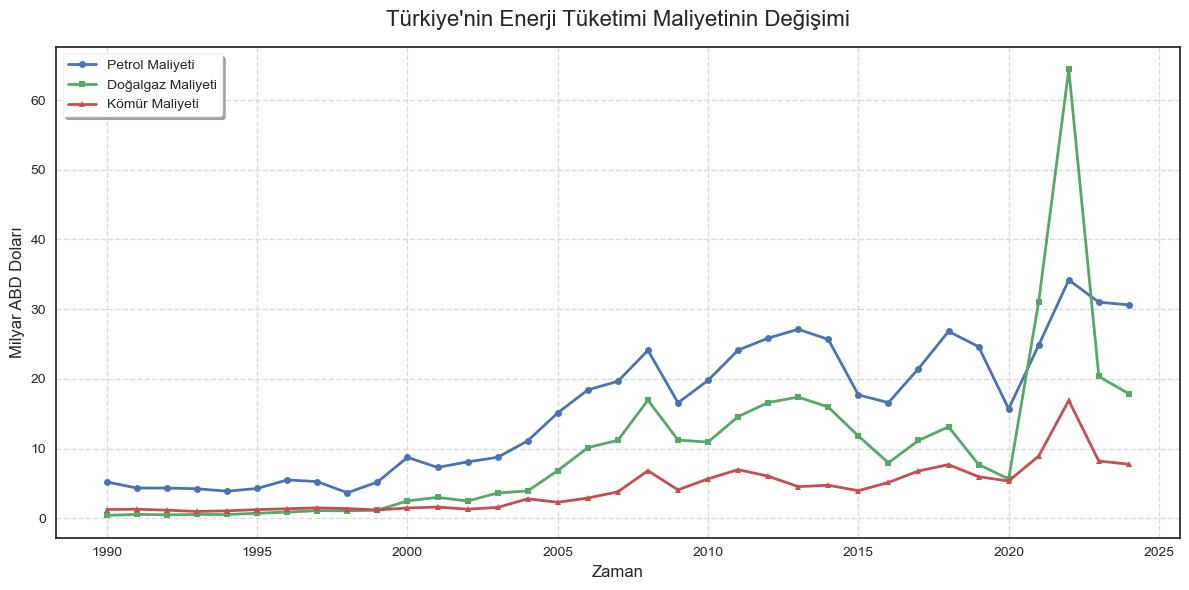

In [64]:
dtr=dt.copy()
dtr=dtr.tail(35)
# Set figure size (12, 8) and a professional style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')  # Using seaborn style for a polished look

# Plot the data with enhanced line styles
plt.plot(dtr.index, dtr.OilCost, label="Petrol Maliyeti", linewidth=2, marker='o', markersize=5)
plt.plot(dtr.index, dtr.GasCost, label="Doğalgaz Maliyeti", linewidth=2, marker='s', markersize=5)
plt.plot(dtr.CoalCost, label="Kömür Maliyeti", linewidth=2, marker='^', markersize=5)

# Add title and labels with proper font sizes
plt.title("Türkiye'nin Enerji Tüketimi Maliyetinin Değişimi", fontsize=16, pad=15)
plt.xlabel("Zaman", fontsize=12)
plt.ylabel("Milyar ABD Doları", fontsize=12)

# Customize legend
plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
std=dt.TotalCost_Share.describe().loc['std']
mean=dt.TotalCost_Share.describe().loc['mean']

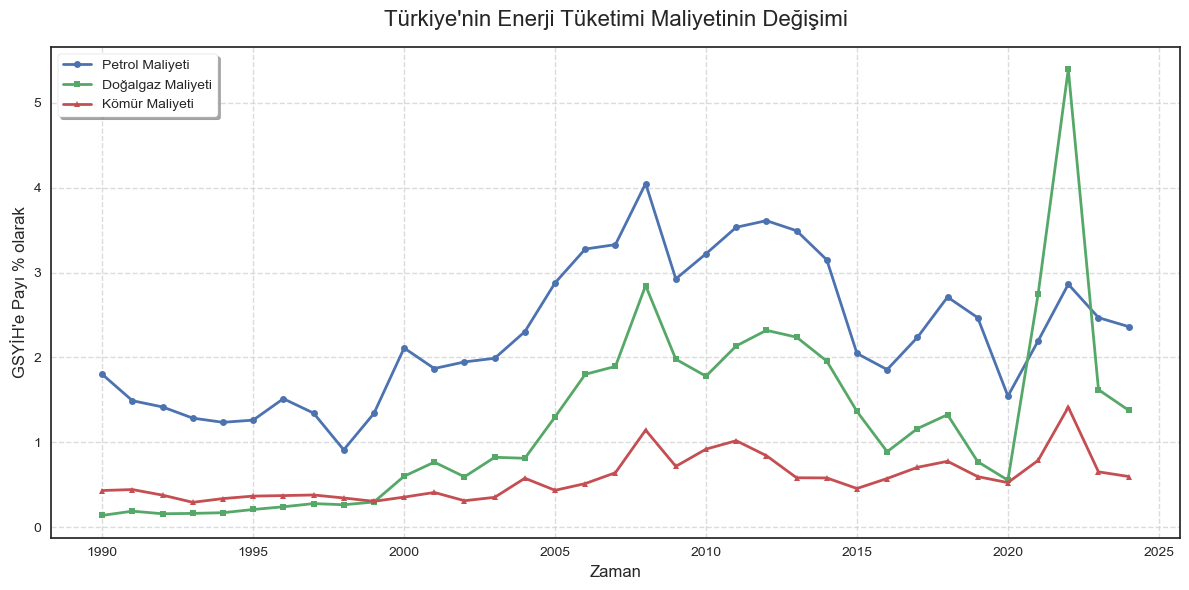

In [67]:
dtr=dt.copy()
dtr=dtr.tail(35)
# Set figure size (12, 8) and a professional style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')  # Using seaborn style for a polished look

# Plot the data with enhanced line styles
plt.plot(dtr.index, 100*dtr.OilCost_Share, label="Petrol Maliyeti", linewidth=2, marker='o', markersize=5)
plt.plot(dtr.index, 100*dtr.GasCost_Share, label="Doğalgaz Maliyeti", linewidth=2, marker='s', markersize=5)
plt.plot(100*dtr.CoalCost_Share, label="Kömür Maliyeti", linewidth=2, marker='^', markersize=5)

# Add title and labels with proper font sizes
plt.title("Türkiye'nin Enerji Tüketimi Maliyetinin Değişimi", fontsize=16, pad=15)
plt.xlabel("Zaman", fontsize=12)
plt.ylabel("GSYİH'e Payı % olarak", fontsize=12)

# Customize legend
plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
std=dt.TotalCost_Share.describe().loc['std']
mean=dt.TotalCost_Share.describe().loc['mean']

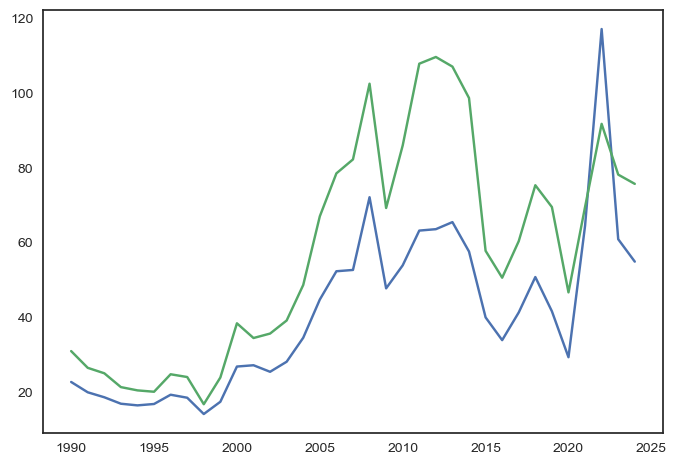

In [68]:
dtr.TotalCost_Share.describe()
dtr ["CostperGJ"]= dtr.TotalCost/(dtr.oilcons_ej+dtr.gascons_ej+dtr.coalcons_ej)
plt.plot(dtr.CostperGJ*5.86)
plt.plot(dtr.Brent[-40:])


Türkiye'nin Toplam Enerji Maliyeti Payı İstatistikleri
                Değer
Sayı            35.00
Ortalama         0.04
Standart Sapma   0.02
Minimum          0.02
%25              0.02
%50              0.04
%75              0.06
Maksimum         0.10


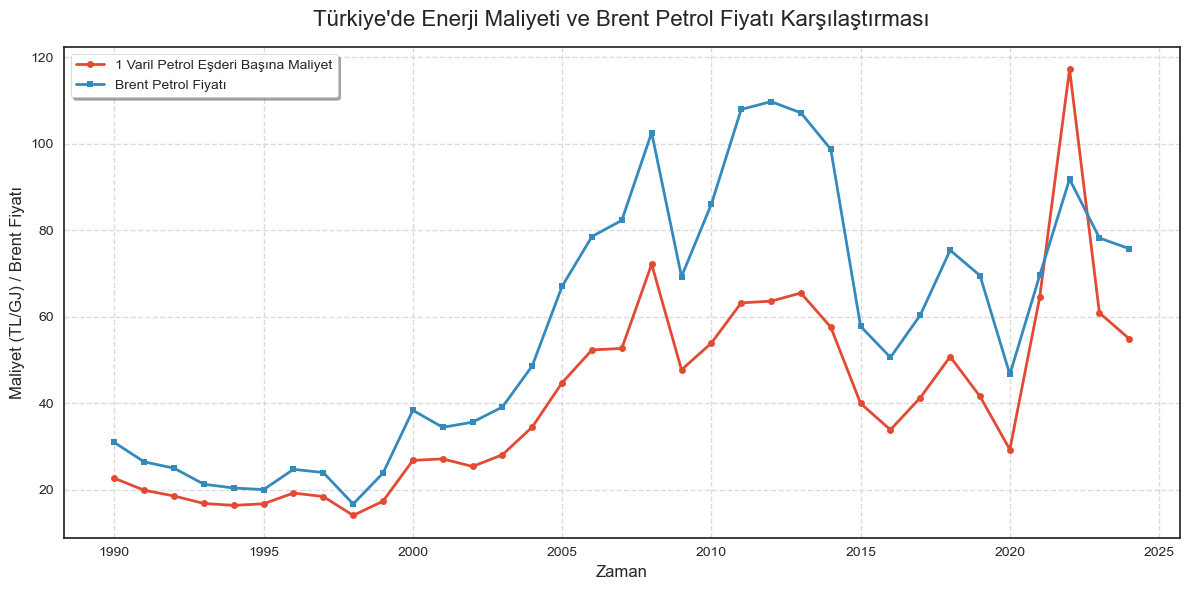

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Display descriptive statistics for TotalCost_Share in a professional format
print("\nTürkiye'nin Toplam Enerji Maliyeti Payı İstatistikleri")
print("=" * 50)
stats = dtr.TotalCost_Share.describe()
formatted_stats = stats.round(2).to_frame().rename(columns={"TotalCost_Share": "Değer"})
formatted_stats.index = ["Sayı", "Ortalama", "Standart Sapma", "Minimum", "%25", "%50", "%75", "Maksimum"]
print(formatted_stats)
print("=" * 50)

# Calculate Cost per GJ
dtr["CostperGJ"] = dtr.TotalCost / (dtr.oilcons_ej + dtr.gascons_ej + dtr.coalcons_ej)

# Set figure size (12, 8) and professional style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Plot Cost per GJ (scaled by 5.86) and Brent prices
plt.plot(dtr.index, dtr.CostperGJ * 5.86, label="1 Varil Petrol Eşderi Başına Maliyet", linewidth=2, marker='o', markersize=5)
plt.plot(dtr.index[-40:], dtr.Brent[-40:], label="Brent Petrol Fiyatı", linewidth=2, marker='s', markersize=5)

# Add title and labels
plt.title("Türkiye'de Enerji Maliyeti ve Brent Petrol Fiyatı Karşılaştırması", fontsize=16, pad=15)
plt.xlabel("Zaman", fontsize=12)
plt.ylabel("Maliyet (TL/GJ) / Brent Fiyatı", fontsize=12)

# Customize legend
plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

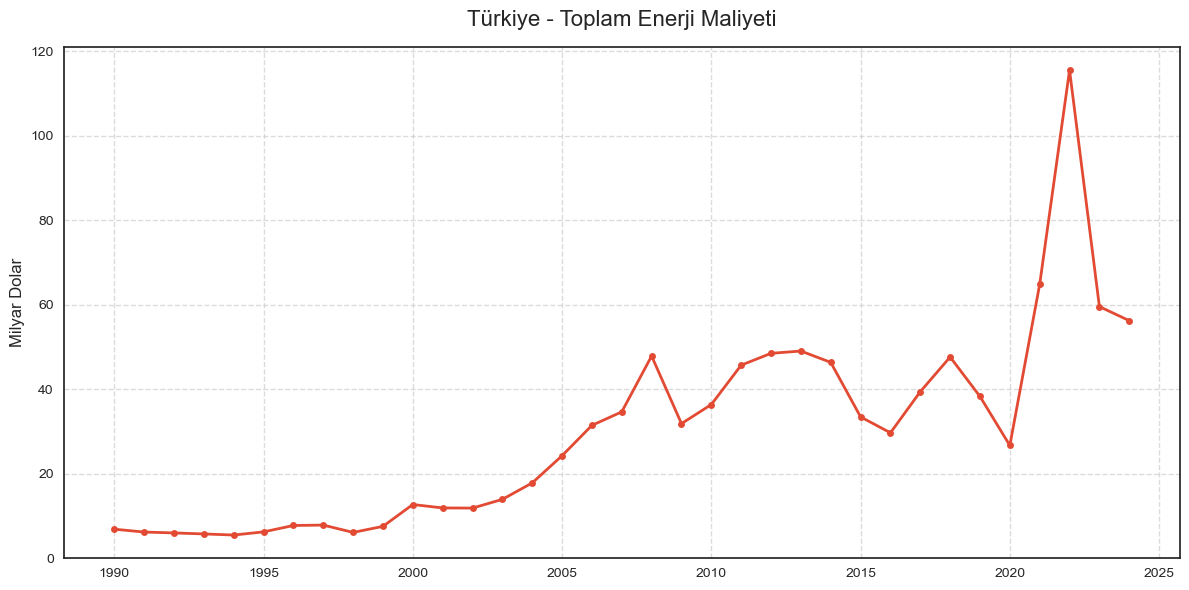

In [77]:

# Set figure size (12, 8) and professional style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Plot Cost per GJ (scaled by 5.86) and Brent prices
plt.plot(dtr.index, dtr.TotalCost, label="Toplam Enerji Tüketim Maliyeti", linewidth=2, marker='o', markersize=5)

# Add title and labels
plt.title("Türkiye - Toplam Enerji Maliyeti", fontsize=16, pad=15)
plt.ylabel("Milyar Dolar", fontsize=12)

# Customize legend


# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

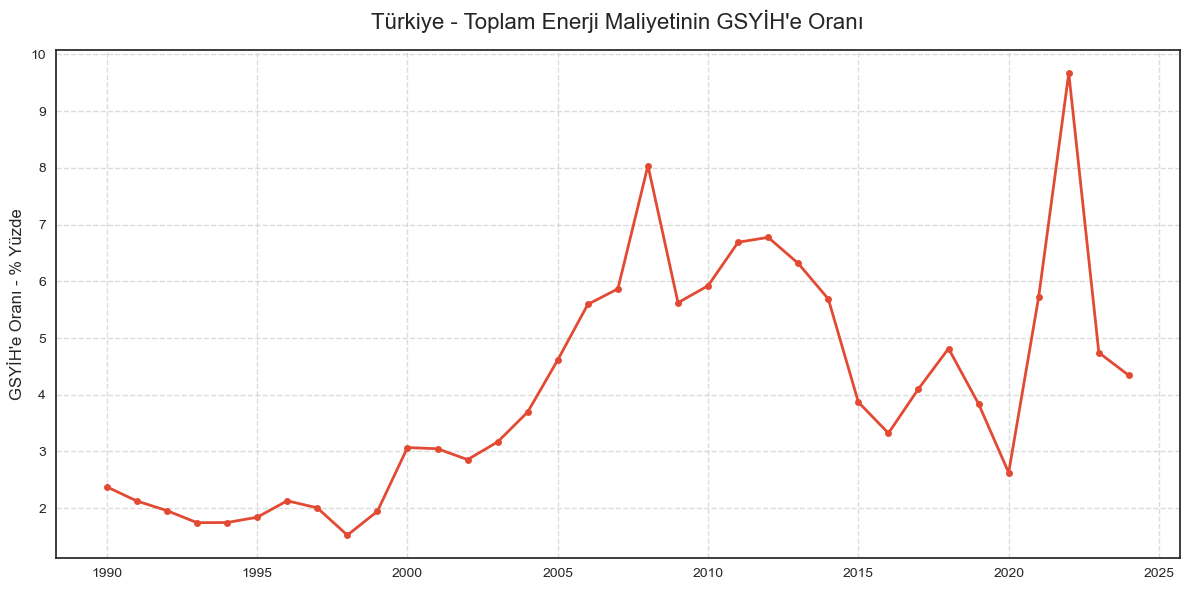

In [80]:

# Set figure size (12, 8) and professional style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Plot Cost per GJ (scaled by 5.86) and Brent prices
plt.plot(dtr.index, 100*dtr.TotalCost_Share, label="Toplam Enerji Tüketim Oranı", linewidth=2, marker='o', markersize=5)

# Add title and labels
plt.title("Türkiye - Toplam Enerji Maliyetinin GSYİH'e Oranı", fontsize=16, pad=15)
plt.ylabel("GSYİH'e Oranı - % Yüzde", fontsize=12)

# Customize legend


# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:

# Set figure size (12, 8) and professional style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Plot Cost per GJ (scaled by 5.86) and Brent prices
plt.plot(dtr.index, dtr.TotalCost, label="Toplam Enerji Tüketim Maliyeti", linewidth=2, marker='o', markersize=5)

# Add title and labels
plt.title("Türkiye'de Enerji Maliyeti ve Brent Petrol Fiyatı Karşılaştırması", fontsize=16, pad=15)
plt.ylabel("Milyar Dolar", fontsize=12)

# Customize legend


# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
dt["Normalized_TCS"]=(dt.TotalCost_Share-mean)/std

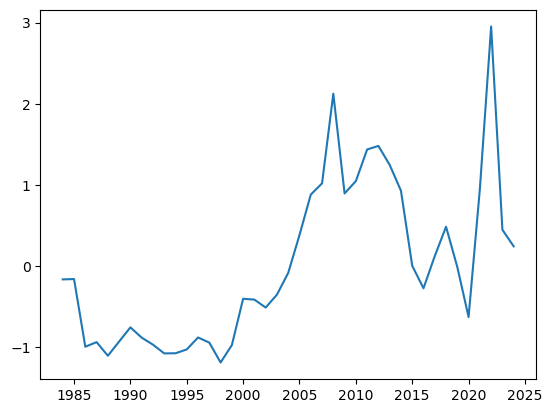

In [21]:
plot(dt["Normalized_TCS"])

In [25]:
dt["GDP_pct"]=dt.GDP.pct_change()
std=dt.GDP_pct.describe().loc['std']
mean=dt.GDP_pct.describe().loc['mean']
dt["Normalized_GDPpct"]=(dt.GDP_pct-mean)/std

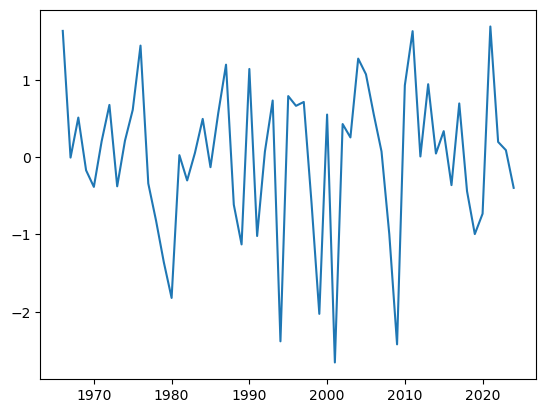

In [26]:
plot(dt["Normalized_GDPpct"])

In [46]:
dt[["GDP_pct","Normalized_GDPpct","TotalCost_Share","Normalized_TCS"]].to_excel("enerjiharcama-buyume.xlsx")

/var/folders/_1/hfj8zq4503j_64m7p0snclz40000gn/T/ipykernel_36193/1864550164.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.2' currently installed).
  dt[["GDP_pct","Normalized_GDPpct","TotalCost_Share","Normalized_TCS"]].to_excel("enerjiharcama-buyume.xlsx")


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual `dt`)
# dt = pd.DataFrame({'Normalized_GDPpct': [...], 'Normalized_TCS': [...]})

# Initialize a dictionary to store correlations
lags = [-1, 0, 1, 2, 3, 4]
correlations = {}

# Calculate correlations for each lag
for lag in lags:
    # Shift Normalized_TCS by the lag
    shifted_tcs = dt['Normalized_GDPpct'].shift(lag)
    # Calculate correlation (drop NaN values caused by shifting)
    corr = dt['Normalized_TCS'].corr(shifted_tcs)
    correlations[lag] = corr

# Convert to Series for easier handling
corr_series = pd.Series(correlations, name='Correlation')
print("Correlations at different lags:")
print(corr_series)

Correlations at different lags:
-1   -0.011935
 0    0.154311
 1    0.233033
 2    0.009048
 3   -0.020925
 4    0.033016
Name: Correlation, dtype: float64


In [36]:
mean

np.float64(0.04757143479608583)